<a href="https://colab.research.google.com/github/ketkiambekar/ML-algorithms/blob/master/Feature%20Maps/FeatureMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose we have a dataset $\{(x^{(i)}, y^{(i)})\}_{i=1}^{n}$ where $x^{(i)}, y^{(i)} \in \mathbb{R}$. 

We would like to fit a third degree polynomial $h_{\theta}(x) = \theta_3x^3 + \theta_2x^2 + \theta_1x^1 + \theta_0$ to the dataset. The key observation here is that the function $h_{\theta}(x)$ is still linear in the unknown parameter $\theta$, even though it's not linear in the input $x$. This allows us to convert the problem into a linear regression problem as follows. 
	
Let $\phi:\mathbb{R}\rightarrow \mathbb{R}^4$ be a function that transforms the original input $x$ to a $4$-dimensional vector defined as
$\begin{align}
\phi(x) = \left[\begin{array}{c} 1\\ x \\ x^2 \\ x^3 \end{array}\right]\in \mathbb{R}^4 
\end{align}$

Let $\hat{x}\in \mathbb{R}^4$ be a shorthand for $\phi(x)$, and let $\hat{x}^{(i)} \triangleq \phi(x^{(i)})$ be the transformed input in the training dataset. We construct a new dataset $\{(\phi(x^{(i)}), y^{(i)})\}_{i=1}^{n} = \{(\hat{x}^{(i)}, y^{(i)})\}_{i=1}^{n}$ by replacing the original inputs $x^{(i)}$'s by $\hat{x}^{(i)}$'s.  We see that fitting $h_{\theta}(x) = \theta_3x^3 + \theta_2x^2 + \theta_1x^1 + \theta_0$ to the old dataset is equivalent to fitting a linear function $h_{\theta}(\hat{x}) = \theta_3\hat{x}_3 +  \theta_2\hat{x}_2 + \theta_1\hat{x}_1 + \theta_0$ to the new dataset because 
\begin{align}
h_\theta(x) =  \theta_3x^3 + \theta_2x^2 + \theta_1x^1 + \theta_0 =  \theta_3 \phi(x)_3 + \theta_2\phi(x)_2 + \theta_1\phi(x)_1 + \theta_0 = \theta^T \hat{x}
\end{align}

In other words, we can use linear regression on the new dataset to find parameters $\theta_0,\dots, \theta_3$.

Our Objective function is:
 \begin{equation*}
 J(\theta)=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\theta}(\hat{x})^{(i)} - y^{(i)}\right)^2\\[30pt]
  \end{equation*}
   (We introduce the term '1/2' for ease of calculation)


Differentiating this objective, we get:



 \begin{equation*}
    \nabla_{\theta} J(\theta)=\frac{2}{2}\sum_{i=1}^{n} \left(h_{\theta}(\hat{x})^{(i)} - y^{(i)}\right). \frac{\partial \left(h_{\theta}(\hat{x})^{(i)} - y^{(i)}\right)}{\partial \theta}
\end{equation*}



 \begin{equation*}
  \therefore  \nabla_{\theta} J(\theta)=\sum_{i=1}^{n} \left(h_{\theta}(\hat{x})^{(i)} - y^{(i)}\right)\hat{x}^{(i)}
\end{equation*}



The gradient descent update rule is

\begin{equation*}
\theta := \theta - \alpha \nabla_{\theta} J(\theta),
\end{equation*}

which reduces here to:


  \begin{equation*}
    \theta := \theta - \alpha \sum_{i=1}^{n} \left(h_{\theta}(\hat{x})^{(i)} - y^{(i)}\right) \hat{x}^{(i)}
    \end{equation*}



Each file contains two columns: $x$ and $y$. In the terminology described in the introduction, $x$ is the attribute (in this case one dimensional) and $y$ is the output label.

We implement linear regression with **normal equations** using the feature map of varying degrees of polynomials.

Linear Regression on Large dataset (70 points)


With 3 dimensional Polynomial Feature Map


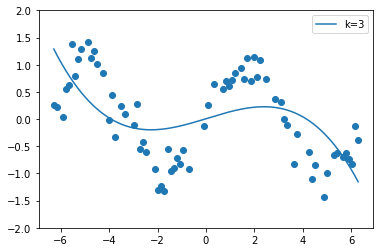



With polynomial Feature Maps of different degrees (1,2,3,5,10,20)


<Figure size 432x288 with 0 Axes>

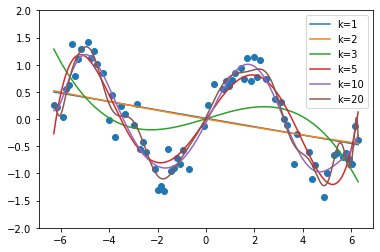



With sinusoidal Feature Maps of different degrees (1,2,3,5,10,20)


<Figure size 432x288 with 0 Axes>

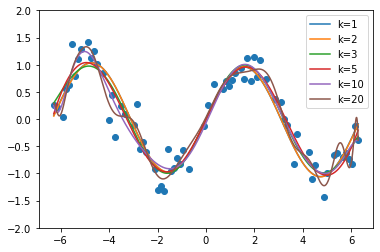

Linear Regression on Small dataset (6 points)




With polynomial Feature Maps of different degrees (1,2,3,5,10,20)


<Figure size 432x288 with 0 Axes>

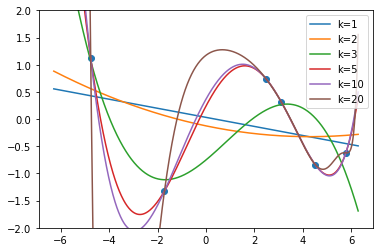



With sinusoidal Feature Maps of different degrees (1,2,3,5,10,20)


<Figure size 432x288 with 0 Axes>

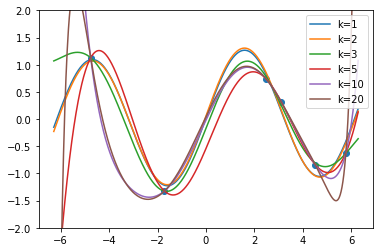

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
np.seterr(all='raise')


factor = 2.0

class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, theta=None):
        """
        Args:
            theta: Weights vector for the model.
        """
        self.theta = theta

    def fit(self, X, y):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the normal equations.

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        
        XtX = np.matmul(np.transpose(X),X)
        Xty = np.matmul(np.transpose(X),y)
        self.theta = np.linalg.solve(XtX, Xty)
    

    def create_poly(self, k, X):
        """
        Generates a polynomial feature map using the data x.
        The polynomial map should have powers from 0 to k
        Output should be a numpy array whose shape is (n_examples, k+1)


        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
       
        poly=np.array([X[i][1]**n for i in range(0,len(X)) for n in range(0,k+1) ])
        poly=poly.reshape(len(X),k+1)

        return poly
     

    def create_sin(self, k, X):
        """
        Generates a sin with polynomial featuremap to the data x.
        Output should be a numpy array whose shape is (n_examples, k+2)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        #Calculate the Sine values of X
        sinX = np.sin(X[:,1])

        #Calculate Polynomial Values of X
        poly=np.array([X[i][1]**n for i in range(0,len(X)) for n in range(0,k+1) ])
        poly=poly.reshape(len(X),k+1)

        #Concatenate the Polynomial and Sine arrays
        plot_x = (np.append(poly, sinX.reshape(len(X),1),axis=1))

        return plot_x
     

    def predict(self, X):
        """
        Make a prediction given new inputs x.
        Returns the numpy array of the predictions.

        Args:
            X: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """

        Y = np.array([x_n[i]*self.theta[i] for x_n in X for i in range(0,len(self.theta)) ])
        Y = Y.reshape(len(X), len(self.theta))
        plot_y= np.array([np.sum(y_n) for y_n in Y])

        return plot_y    



def run_exp(train_path, sine=False, ks=[1, 2, 3, 5, 10, 20], filename='plot.png'):
    train_x,train_y=load_dataset(train_path,add_intercept=True)
    plot_x = np.ones([1000, 2])
    plot_x[:, 1] = np.linspace(-factor*np.pi, factor*np.pi, 1000)
    plt.figure()
    plt.scatter(train_x[:, 1], train_y)


    for k in ks:
        '''
        Our objective is to train models and perform predictions on plot_x data
        '''
      
        plot_xp=None
        plot_yp=None

        l = LinearModel() 

        if sine:
            plot_xf = l.create_sin(k,train_x)
            plot_xp = l.create_sin(k,plot_x)
        else:
            plot_xf = l.create_poly(k,train_x)
            plot_xp = l.create_poly(k,plot_x)

        #Train our model
        l.fit(plot_xf,train_y)

        #Predict Values
        plot_yp = l.predict(plot_xp)

        #Sort the predicted values for plotting
        sorted_xy = sorted((i,j) for i,j in zip(plot_x[:,1],plot_yp))
        plot_x1 = [i for i,j in sorted_xy]
        plot_y1 = [j for i,j in sorted_xy]

        '''
        Here plot_y are the predictions of the linear model on the plot_x data
        '''
        plt.ylim(-2, 2)
        plt.plot(plot_x1, plot_y1, label='k=%d' % k)

    plt.legend()
    plt.savefig(filename)
    plt.show()
    plt.clf()


def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array.

    Returns:
        New matrix same as x with 1's in the 0th column.
    """
    new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x

    return new_x


def load_dataset(csv_path, label_col='y', add_intercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 't').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """

    def add_intercept_fn(x):
        global add_intercept
        return add_intercept(x)

    # Validate label_col argument
    allowed_label_cols = ('y', 't')
    if label_col not in allowed_label_cols:
        raise ValueError('Invalid label_col: {} (expected {})'
                         .format(label_col, allowed_label_cols))

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
    inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
    labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

    if inputs.ndim == 1:
        inputs = np.expand_dims(inputs, -1)

    if add_intercept:
        inputs = add_intercept_fn(inputs)

    return inputs, labels


def plot(x, y, theta, save_path, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
    plt=None
    plt.figure(figsize=((432,288)))
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] + theta[1] / theta[2] * x1
           + np.log((2 - correction) / correction) / theta[2])
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-.1, x[:, -2].max()+.1)
    plt.ylim(x[:, -1].min()-.1, x[:, -1].max()+.1)

    # Add labels and save 
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    #plt.savefig(save_path)



def main(train_path, small_path, eval_path):
    '''
    Run all experiments
    '''
    print("Linear Regression on Large dataset (70 points)\n\n")
    print("With 3 dimensional Polynomial Feature Map" )
    run_exp(train_path,False,[3])


    print("\n\nWith polynomial Feature Maps of different degrees (1,2,3,5,10,20)")
    run_exp(train_path,False)

    print("\n\nWith sinusoidal Feature Maps of different degrees (1,2,3,5,10,20)")
    run_exp(train_path,True)

    print("Linear Regression on Small dataset (6 points)\n\n")

    print("\n\nWith polynomial Feature Maps of different degrees (1,2,3,5,10,20)")
    run_exp(small_path,False)

    print("\n\nWith sinusoidal Feature Maps of different degrees (1,2,3,5,10,20)")
    run_exp(small_path,True)


if __name__ == '__main__':
    main(train_path='train.csv',
        small_path='small.csv',
        eval_path='test.csv')


We obeserve that it requires a relatively high degree $k$ to fit the given training data, and this is because the dataset cannot be explained (i.e., approximated) very well by low-degree polynomials. By visualizing the data, we can see that $y$ can be approximated well by a sine wave. In fact, the data was generated by sampling from $y = \sin(x) + \xi$, where $\xi$ is noise with Gaussian distribution.